<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n250.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,54.091178,-4.837157,59.254021,61.780465,-2.526444
1,0.0,1.0,65.163634,59.954594,135.118228,74.728494,60.389734
2,0.0,2.0,76.046646,74.496106,160.542752,87.454988,73.087764
3,0.0,3.0,42.868132,-39.669841,13.198291,48.656338,-35.458047
4,0.0,4.0,69.162672,26.063755,105.226428,79.404932,25.821495
...,...,...,...,...,...,...,...
59995,999.0,55.0,97.381238,56.831783,164.213021,102.381927,61.831094
59996,999.0,56.0,56.111252,67.257232,133.368485,58.958932,74.409553
59997,999.0,57.0,65.825618,-63.884851,11.940767,69.180085,-57.239318
59998,999.0,58.0,28.964200,-33.033680,5.930520,30.395647,-24.465127


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,54.091178,-4.837157,59.254021,61.780465,-2.526444
1,0.0,1.0,65.163634,59.954594,135.118228,74.728494,60.389734
2,0.0,2.0,76.046646,74.496106,160.542752,87.454988,73.087764
3,0.0,3.0,42.868132,-39.669841,13.198291,48.656338,-35.458047
4,0.0,4.0,69.162672,26.063755,105.226428,79.404932,25.821495
...,...,...,...,...,...,...,...
59995,999.0,55.0,97.381238,56.831783,164.213021,102.381927,61.831094
59996,999.0,56.0,56.111252,67.257232,133.368485,58.958932,74.409553
59997,999.0,57.0,65.825618,-63.884851,11.940767,69.180085,-57.239318
59998,999.0,58.0,28.964200,-33.033680,5.930520,30.395647,-24.465127


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    54.091178  -4.837157   59.254021   61.780465  -2.526444
      1.0    65.163634  59.954594  135.118228   74.728494  60.389734
      2.0    76.046646  74.496106  160.542752   87.454988  73.087764
      3.0    42.868132 -39.669841   13.198291   48.656338 -35.458047
      4.0    69.162672  26.063755  105.226428   79.404932  25.821495
...                ...        ...         ...         ...        ...
999.0 55.0   97.381238  56.831783  164.213021  102.381927  61.831094
      56.0   56.111252  67.257232  133.368485   58.958932  74.409553
      57.0   65.825618 -63.884851   11.940767   69.180085 -57.239318
      58.0   28.964200 -33.033680    5.930520   30.395647 -24.465127
      59.0   35.092039  -5.901181   39.190858   36.843169   2.347689

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    54.091178  -4.837157   59.254021   61.780465  -2.526444
      1.0    65.163634  59.954594  135.118228   74.728494  60.389734
      2.0    76.046646  74.496106  160.542752   87.454988  73.087764
      3.0    42.868132 -39.669841   13.198291   48.656338 -35.458047
      4.0    69.162672  26.063755  105.226428   79.404932  25.821495
...                ...        ...         ...         ...        ...
999.0 55.0   97.381238  56.831783  164.213021  102.381927  61.831094
      56.0   56.111252  67.257232  133.368485   58.958932  74.409553
      57.0   65.825618 -63.884851   11.940767   69.180085 -57.239318
      58.0   28.964200 -33.033680    5.930520   30.395647 -24.465127
      59.0   35.092039  -5.901181   39.190858   36.843169   2.347689

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,54.091178,-4.837157,59.254021,61.780465,-2.526444
1,0.0,1.0,65.163634,59.954594,135.118228,74.728494,60.389734
2,0.0,2.0,76.046646,74.496106,160.542752,87.454988,73.087764
3,0.0,3.0,42.868132,-39.669841,13.198291,48.656338,-35.458047
4,0.0,4.0,69.162672,26.063755,105.226428,79.404932,25.821495
...,...,...,...,...,...,...,...
59995,999.0,55.0,97.381238,56.831783,164.213021,102.381927,61.831094
59996,999.0,56.0,56.111252,67.257232,133.368485,58.958932,74.409553
59997,999.0,57.0,65.825618,-63.884851,11.940767,69.180085,-57.239318
59998,999.0,58.0,28.964200,-33.033680,5.930520,30.395647,-24.465127


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    54.091178  -4.837157   59.254021   61.780465  -2.526444
      1.0    65.163634  59.954594  135.118228   74.728494  60.389734
      2.0    76.046646  74.496106  160.542752   87.454988  73.087764
      3.0    42.868132 -39.669841   13.198291   48.656338 -35.458047
      4.0    69.162672  26.063755  105.226428   79.404932  25.821495
...                ...        ...         ...         ...        ...
999.0 55.0   97.381238  56.831783  164.213021  102.381927  61.831094
      56.0   56.111252  67.257232  133.368485   58.958932  74.409553
      57.0   65.825618 -63.884851   11.940767   69.180085 -57.239318
      58.0   28.964200 -33.033680    5.930520   30.395647 -24.465127
      59.0   35.092039  -5.901181   39.190858   36.843169   2.347689

[60000 rows x 5 columns]

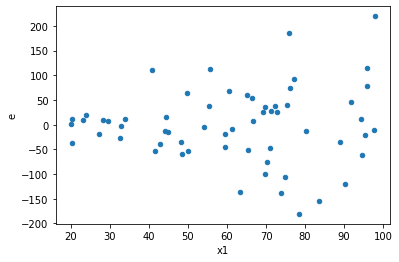

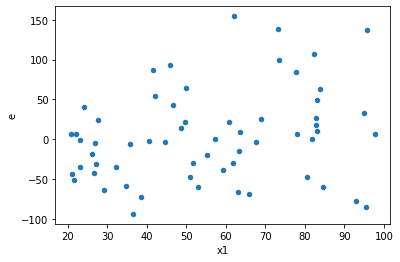

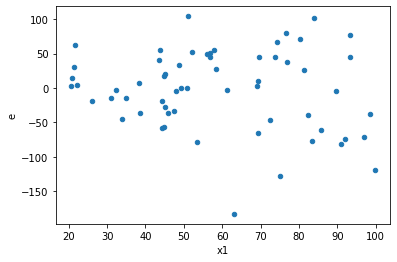

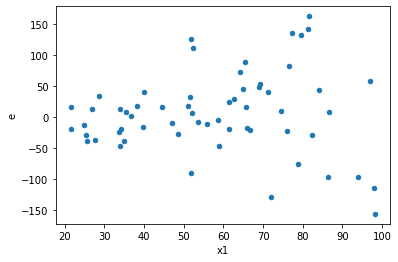

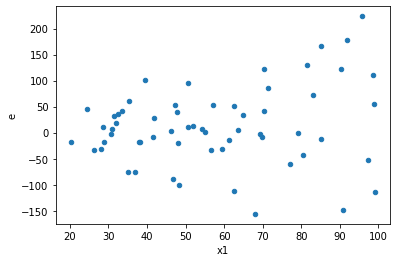

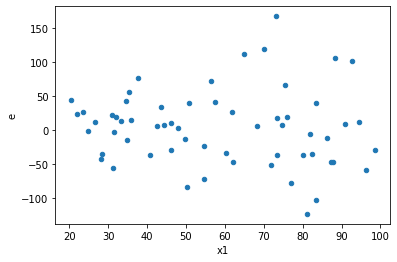

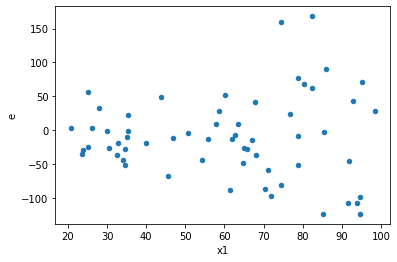

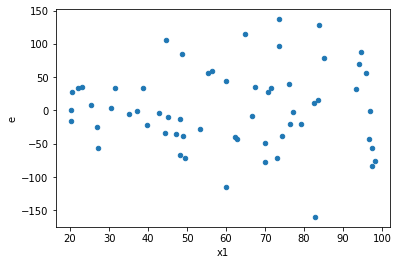

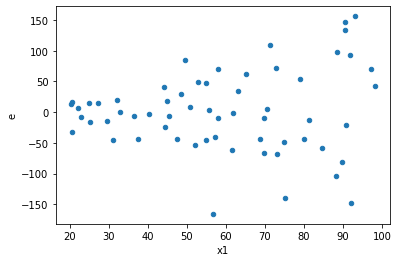

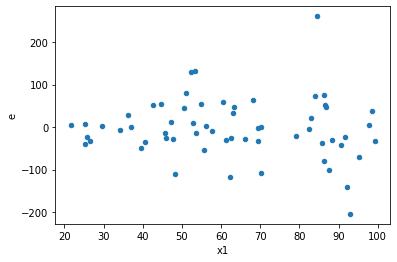

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,23.0,23.0,45635.52817801825,227220.1080272595,1984.1533990442717,9879.135131619978,4.979017820083148,0.0002830120370052036,0.9998584939814974,0.0001415060185026018,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,46277.220038395266,97270.33124367933,2012.0530451476202,4229.14483668171,2.1019052389701915,0.08140467376251403,0.959297663118743,0.04070233688125702,Reject001=1 : Homoscedasticity
2.0,23.0,23.0,23901.61754377763,97671.9374735004,1039.2007627729404,4246.605977108713,4.086415377311047,0.001299705554356212,0.9993501472228219,0.000649852777178106,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,21691.13289623383,167484.93687343074,943.0927346188622,7281.953777105684,7.721354973695757,6.561577373220828e-06,0.9999967192113134,3.280788686610414e-06,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,48089.138478111745,225756.46763525694,2090.832107743989,9815.498592837259,4.694541736030731,0.00045110788863356177,0.9997744460556832,0.00022555394431678089,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,23842.19940778205,114533.22327829564,1036.6173655557413,4979.705359925897,4.803802758268693,0.00037637403908563627,0.9998118129804572,0.00018818701954281813,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,20639.927655485182,178284.80550556272,897.3881589341383,7751.513282850553,8.637860000356275,2.335556221977342e-06,0.999998832221889,1.167778110988671e-06,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,40927.08521483777,116137.51948371828,1779.438487601642,5049.457368857316,2.837668963574606,0.015449612436177373,0.9922751937819113,0.007724806218088687,Reject001=1 : Homoscedasticity
8.0,23.0,23.0,22307.45619869251,171504.281208262,969.8893999431526,7456.707878620086,7.68820432418082,6.823290341628763e-06,0.9999965883548292,3.4116451708143813e-06,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,45635.52817801825,227220.1080272595,1984.1533990442717,9879.135131619978,4.979017820083148,0.0002830120370052036,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,46277.220038395266,97270.33124367933,2012.0530451476202,4229.14483668171,2.1019052389701915,0.08140467376251403,Reject001=1 : Homoscedasticity
2.0,23.0,23.0,23901.61754377763,97671.9374735004,1039.2007627729404,4246.605977108713,4.086415377311047,0.001299705554356212,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,21691.13289623383,167484.93687343074,943.0927346188622,7281.953777105684,7.721354973695757,6.561577373220828e-06,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,48089.138478111745,225756.46763525694,2090.832107743989,9815.498592837259,4.694541736030731,0.00045110788863356177,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,23842.19940778205,114533.22327829564,1036.6173655557413,4979.705359925897,4.803802758268693,0.00037637403908563627,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,20639.927655485182,178284.80550556272,897.3881589341383,7751.513282850553,8.637860000356275,2.335556221977342e-06,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,40927.08521483777,116137.51948371828,1779.438487601642,5049.457368857316,2.837668963574606,0.015449612436177373,Reject001=1 : Homoscedasticity
8.0,23.0,23.0,22307.45619869251,171504.281208262,969.8893999431526,7456.707878620086,7.68820432418082,6.823290341628763e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    854
Reject001=1 : Homoscedasticity      146
Name: Result_test, dtype: int64